In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras import layers, losses
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')


In [109]:
test_name = 'centralized_all_w_local_training_wo_global_data'
loss = 'mse'
model = 'All'
model_type = 'CNN'

datas = []
for i in ['train', 'evaluate_before_train', 'evaluate']:

    file = f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/{model_type}/{test_name}/{i}/loss_{loss}_{model}.csv'
    names = ['cid', 'round', 'loss','diff', 'anomaly', 'anomaly2']

    data = pd.read_csv(file,
                    names = names)
    
    datas.append(data)

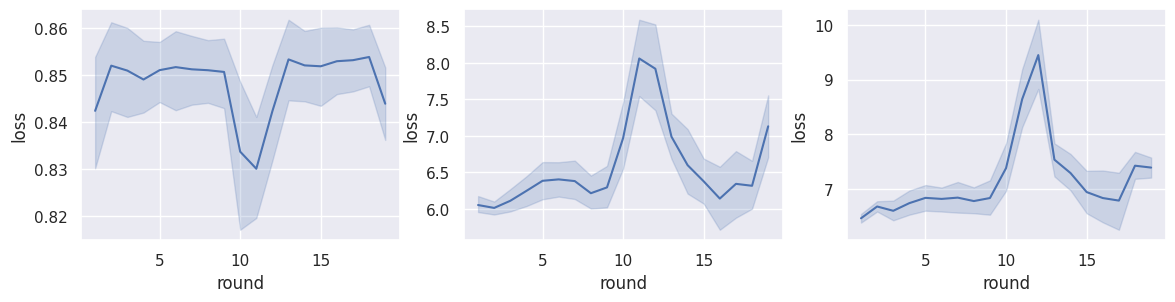

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

for i in range(3):
    sns.lineplot(datas[i], x = 'round', y = 'loss', ax = axs[i])#, hue='cid', alpha = 0.3)

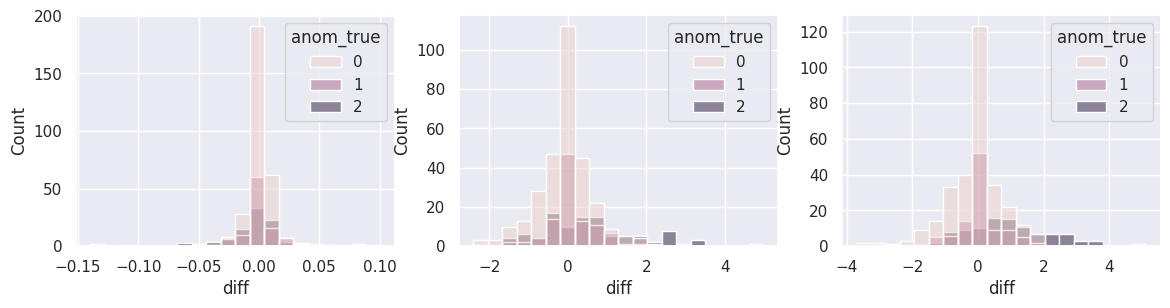

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

for i in range(3):
    datas[i]['anom_true'] = datas[i]['round'].apply(lambda x: 1 if x==3 or x==4 or x==5 else (2 if x==12 or x==10 or x==11 else 0))
    sns.histplot(x = datas[i]['diff'], hue = datas[i]['anom_true'], bins = 20, ax = axs[i])

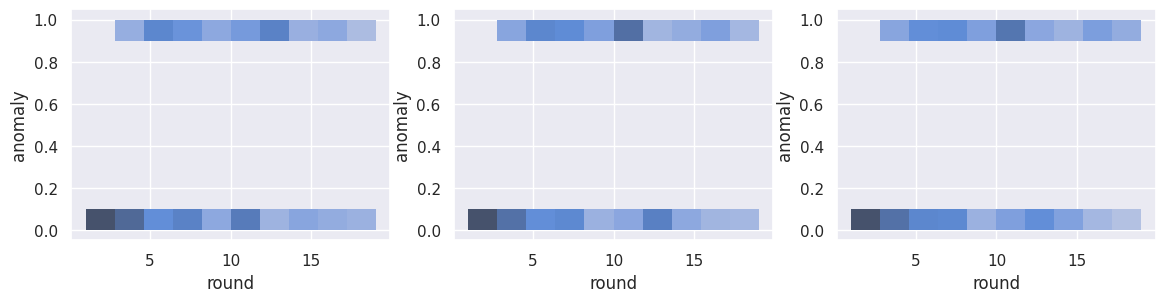

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

for i in range(3):
    sns.histplot(x = datas[i]['round'], y = datas[i]['anomaly'], ax = axs[i])#, hue = data['anom_true'], bins = 20)

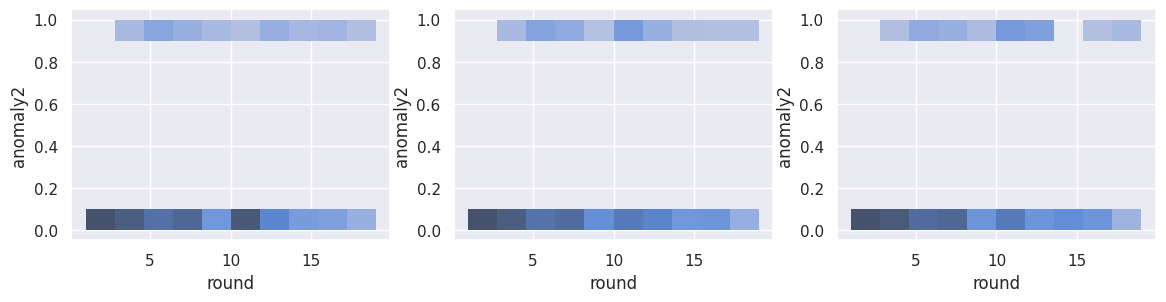

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

for i in range(3):
    sns.histplot(x = datas[i]['round'], y = datas[i]['anomaly2'], ax = axs[i])#, hue = data['anom_true'], bins = 20)

In [114]:
for i in range(3):

    data = datas[i]
    data['true_anomaly'] = data['round'].apply(lambda x: 1 if x>=9 else 0)

    data['anomaly12'] = data['anomaly'] + data['anomaly2'] 
    data['anomaly12'] = data['anomaly12'].apply(lambda x: 1 if x==2 else x)

    print('Anomaly1 ',f1_score(data['anomaly'], data['true_anomaly']),
        precision_score(data['anomaly'], data['true_anomaly']),
        recall_score(data['anomaly'], data['true_anomaly']),
        accuracy_score(data['anomaly'], data['true_anomaly']))

    print('Anomaly2 ',f1_score(data['anomaly2'], data['true_anomaly']),
        precision_score(data['anomaly2'], data['true_anomaly']),
        recall_score(data['anomaly2'], data['true_anomaly']),
        accuracy_score(data['anomaly2'], data['true_anomaly']))
    
    print('Anomaly12 ',f1_score(data['anomaly12'], data['true_anomaly']),
        precision_score(data['anomaly12'], data['true_anomaly']),
        recall_score(data['anomaly12'], data['true_anomaly']),
        accuracy_score(data['anomaly12'], data['true_anomaly']))
    
    print('-----------')



Anomaly1  0.5441860465116278 0.5 0.5969387755102041 0.6126482213438735
Anomaly2  0.2990654205607477 0.20512820512820512 0.5517241379310345 0.5553359683794467
Anomaly12  0.5846153846153846 0.5683760683760684 0.6018099547511312 0.6264822134387352
-----------
Anomaly1  0.5688888888888889 0.5470085470085471 0.5925925925925926 0.616600790513834
Anomaly2  0.32628398791540786 0.23076923076923078 0.5567010309278351 0.5592885375494071
Anomaly12  0.5854700854700855 0.5854700854700855 0.5854700854700855 0.616600790513834
-----------
Anomaly1  0.5960264900662252 0.5769230769230769 0.6164383561643836 0.6383399209486166
Anomaly2  0.3855421686746988 0.27350427350427353 0.6530612244897959 0.5968379446640316
Anomaly12  0.6289308176100629 0.6410256410256411 0.6172839506172839 0.650197628458498
-----------


In [115]:
#DESCENTRALIZED
# Anomaly1  0.5519591141396933 0.4682080924855491 0.6721991701244814 0.5744336569579288
# Anomaly2  0.3891213389121339 0.26878612716763006 0.7045454545454546 0.5275080906148867
# Anomaly12  0.6309148264984227 0.5780346820809249 0.6944444444444444 0.6213592233009708
# -----------
# Anomaly1  0.5792880258899676 0.5173410404624278 0.6580882352941176 0.5792880258899676
# Anomaly2  0.2945054945054945 0.1936416184971098 0.6146788990825688 0.48058252427184467
# Anomaly12  0.6122448979591837 0.5635838150289018 0.6701030927835051 0.6003236245954693
# -----------
# Anomaly1  0.6382393397524071 0.5686274509803921 0.7272727272727273 0.6132352941176471
# Anomaly2  0.27722772277227725 0.1715686274509804 0.7216494845360825 0.4632352941176471
# Anomaly12  0.6457765667574932 0.5808823529411765 0.7269938650306749 0.6176470588235294
# -----------


#Decoder (não é para haver diferença)
# Anomaly1  0.547008547008547 0.4624277456647399 0.6694560669456067 0.5711974110032363
# Anomaly2  0.3958333333333333 0.2745664739884393 0.7089552238805971 0.5307443365695793
# Anomaly12  0.6287519747235387 0.5751445086705202 0.6933797909407665 0.6197411003236246
# -----------
# Anomaly1  0.5886178861788617 0.523121387283237 0.6728624535315985 0.5906148867313916
# Anomaly2  0.2806236080178174 0.18208092485549132 0.6116504854368932 0.4773462783171521
# Anomaly12  0.611023622047244 0.5606936416184971 0.671280276816609 0.6003236245954693
# -----------
# Anomaly1  0.603085553997195 0.5269607843137255 0.7049180327868853 0.5838235294117647
# Anomaly2  0.2505050505050505 0.15196078431372548 0.7126436781609196 0.45441176470588235
# Anomaly12  0.611111111111111 0.5392156862745098 0.7051282051282052 0.5882352941176471
# -----------

In [116]:
#CENTRALIZED
#Anomaly1  0.5960264900662252 0.5769230769230769 0.6164383561643836 0.6383399209486166
#Anomaly2  0.3855421686746988 0.27350427350427353 0.6530612244897959 0.5968379446640316
#Anomaly12  0.6289308176100629 0.6410256410256411 0.6172839506172839 0.650197628458498


In [117]:
#evaluate - wo PCA All
#Anomaly1  0.7466216216216216 0.8125 0.690625 0.7242647058823529
#Anomaly2  0.08304498269896195 0.04411764705882353 0.7058823529411765 0.5128676470588235
#Anomaly12  0.7504187604690116 0.8235294117647058 0.6892307692307692 0.7261029411764706

#running again:
#Anomaly1  0.7952380952380952 0.8186274509803921 0.7731481481481481 0.7470588235294118
#Anomaly2  0.13513513513513514 0.07352941176470588 0.8333333333333334 0.43529411764705883
#Anomaly12  0.8112543962485346 0.8480392156862745 0.7775280898876404 0.763235294117647

## running again:
# Anomaly1  0.7484811664641555 0.7549019607843137 0.7421686746987952 0.6955882352941176
# Anomaly2  0.2226980728051392 0.12745098039215685 0.8813559322033898 0.4661764705882353
# Anomaly12  0.7748815165876777 0.8014705882352942 0.75 0.7205882352941176

# train- wo Decoder
#Anomaly1  0.547008547008547 0.4624277456647399 0.6694560669456067 0.5711974110032363
#Anomaly2  0.4024896265560166 0.28034682080924855 0.7132352941176471 0.5339805825242718
#Anomaly12  0.6330708661417322 0.5809248554913294 0.6955017301038062 0.6229773462783171

#evaluate - wo PCA Encoder
#Anomaly1  0.6337448559670782 0.5661764705882353 0.719626168224299 0.6073529411764705
#Anomaly2  0.27218934911242604 0.16911764705882354 0.696969696969697 0.4573529411764706
#Anomaly12  0.645945945945946 0.5857843137254902 0.7198795180722891 0.6147058823529412


In [118]:
#evaluate - PCA2 All
#Anomaly1  0.6947040498442366 0.6861538461538461 0.7034700315457413 0.6716917922948074
#Anomaly2  0.1758241758241758 0.09846153846153846 0.8205128205128205 0.49748743718592964
#Anomaly12  0.7127496159754224 0.7138461538461538 0.7116564417177914 0.6867671691792295

#evaluate before train- PCA2 Decoder
#Anomaly1  0.5945072697899838 0.5317919075144508 0.673992673992674 0.5938511326860841
#Anomaly2  0.29074889867841414 0.1907514450867052 0.6111111111111112 0.47896440129449835
#Anomaly12  0.6151419558359622 0.5635838150289018 0.6770833333333334 0.6051779935275081

In [119]:
#evaluate - PCA3 All
#Anomaly1  0.7166454891994918 0.6911764705882353 0.7440633245382586 0.6720588235294118
#Anomaly2  0.25157232704402516 0.14705882352941177 0.8695652173913043 0.475
#Anomaly12  0.7338308457711443 0.7230392156862745 0.7449494949494949 0.6852941176470588

In [120]:
#evaluate - PCA4 All
#Anomaly1  0.7300380228136881 0.7058823529411765 0.7559055118110236 0.6867647058823529
#Anomaly2  0.18454935622317598 0.1053921568627451 0.7413793103448276 0.4411764705882353
#Anomaly12  0.7390761548064918 0.7254901960784313 0.7531806615776081 0.6926470588235294

In [121]:
#evaluate - PCA8 All
#Anomaly1  0.7688564476885644 0.7745098039215687 0.7632850241545893 0.7205882352941176
#Anomaly2  0.21397379912663755 0.12009803921568628 0.98 0.47058823529411764
#Anomaly12  0.7792521109770807 0.7916666666666666 0.7672209026128266 0.7308823529411764

In [122]:
34*20

680

In [123]:
#verificar tamanho dos experimentos
#verificar começo das anomalias